# Tugas Besar 2 IF3170 Inteligensi Buatan 

Kelompok Budak McD :
    1. Renjira Naufhal Dhiaegana    - 13516014
    2. M. Nurraihan Naufal          - 13516017
    3. Yuly Haruka Berliana Gunawan - 13516031
    4. Raka Hadhyana                - 13516099
    5. Naufal Putra Pamungkas       - 13516110

## Reading Train Data
Melakukan pembacaan data <i>HeartDisease_train.csv</i>

In [1]:
import pandas as pd

heartD = pd.read_csv('tubes2_HeartDisease_train.csv')
heartD_target = heartD['Column14']
heartD_data = heartD.loc[:, :'Column13']
heartD_feature_names = ['age', 'sex', 'chest-pain type', 'resting blod presure', 'serum cholestrol', 
                        'fasting blood sugar above 120 mg/dl', 'resting ECG', 'max heart rate achieved', 'exercise induced angina',
                       'ST depression induced', 'peak exercise ST segment', 'member of major vessel', 'thal']

heartD_target_names = ['absence', 'presence', 'presence', 'presence', 'presence']

#print (heartD_data)

## Reading Test Data
Melakukan pembacaan data <i>HeartDisease_test.csv</i>

In [2]:
testD = pd.read_csv('tubes2_HeartDisease_test.csv')

Pada data train (*heartD_data*) dan data test (*testD*) dilakukan penggantian nilai <b>?</b> dengan nilai <b>-1</b>

In [3]:
heartD_data.replace('?', -1, inplace=True)
testD.replace('?',-1,inplace=True)

## Missing Values Handling

Melakukan pengisian *missing values* dengan sebuah konstan, *strategy* yang digunakan adalah : <b>mean</b>

In [4]:
import numpy as np 
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=-1, strategy="mean")
imp.fit(heartD_data.values)
heartD_data = imp.transform(heartD_data)

imp.fit(testD.values)
testD = imp.transform(testD)


## Experiment on Learning Algorithms

### 1. Naive Bayes
Menggunakan Gaussian Naive Bayes

In [5]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

print('Gaussian Naive Bayes:')
# fit a Naive Bayes model to the data
gnb = GaussianNB()
gnb_class = gnb.fit(heartD_data, heartD_target)
print(gnb_class)

# make predictions
expected = heartD_target
predicted = gnb_class.predict(testD)
# summarize the fit of the model

print('\n')
print('Hasil prediksi :')
print(predicted)

Gaussian Naive Bayes:
GaussianNB(priors=None, var_smoothing=1e-09)


Hasil prediksi :
[0 0 1 1 0 0 4 1 0 1 1 1 0 4 0 4 2 0 1 0 0 1 0 1 1 0 1 3 3 1 0 1 2 0 1 0 0
 0 0 0 1 0 0 1 1 1 1 2 1 1 1 0 2 1 0 1 1 4 1 0 0 0 1 4 0 0 1 0 0 0 1 0 0 1
 0 1 1 0 0 0 0 4 1 1 0 2 1 0 3 1 3 0 0 0 0 0 0 1 1 0 2 0 0 0 1 1 0 1 1 3 0
 0 2 0 0 4 0 3 0 1 2 1 0 1 1 0 4 2 2 1 0 1 3 1 3 3 0 0 0 0 0]


### 2. Decision Tree ID3

[0 1 0 3 1 0 3 0 1 0 1 0 0 0 0 4 1 0 0 0 0 3 0 3 3 0 3 1 3 4 0 1 3 0 3 0 0
 0 0 0 3 0 0 1 3 1 1 4 3 3 1 1 1 0 1 0 1 3 1 0 0 0 2 2 1 2 1 0 0 1 3 0 2 1
 0 0 0 0 0 0 0 1 0 3 0 3 0 0 0 4 3 0 0 0 0 0 0 1 2 0 4 0 3 0 4 0 0 3 1 2 0
 0 0 0 0 2 0 3 0 3 3 1 0 3 3 0 0 3 0 2 0 1 3 2 3 4 0 1 0 1 0]


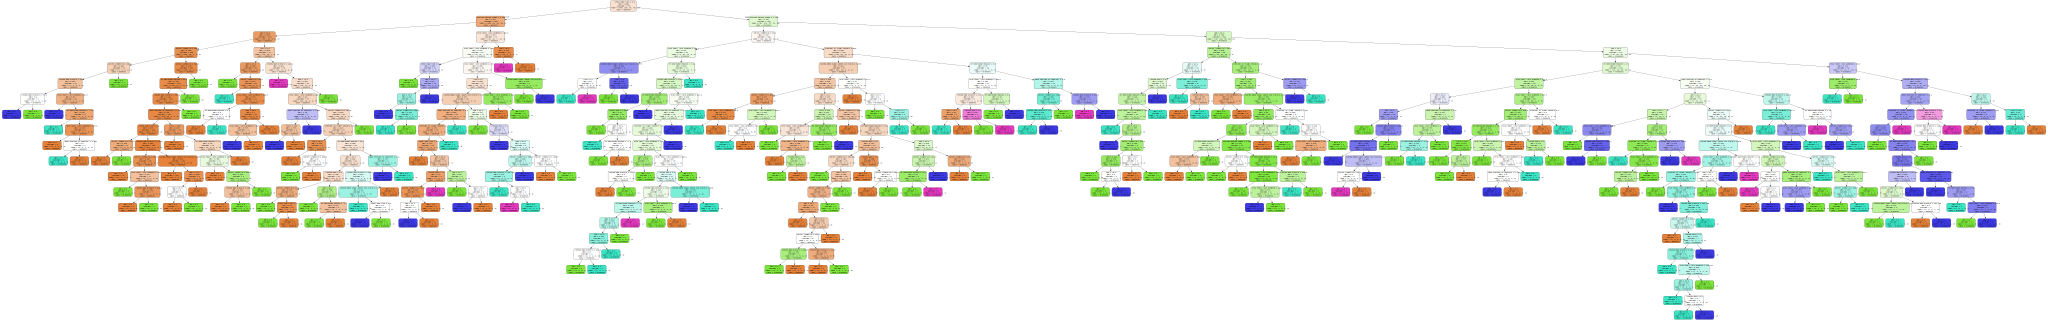

In [6]:
from sklearn import tree
import graphviz

DescTree = tree.DecisionTreeClassifier()
DescTree_class = DescTree.fit(heartD_data, heartD_target)
DescTree_predict = DescTree_class.predict(testD)
print (DescTree_predict)

dot_data = tree.export_graphviz(DescTree, out_file=None, 
                         feature_names=heartD_feature_names,  
                         class_names=heartD_target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

### 3. *k*-Nearest Neighbor

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

kneighbors = KNeighborsClassifier(n_neighbors = 1)
kneighbors_class = kneighbors.fit(heartD_data, heartD_target)
kneighbors_predict = kneighbors_class.predict(testD)
print (kneighbors_predict)

# cm_kn = confusion_matrix(testD, kneighbors_predict)
# plt.figure()
# plot_confusion_matrix(cm_kn, classes = heartD_target_names, title='Confusion Matrix')

[0 0 0 0 1 0 3 0 0 1 2 3 0 0 1 1 1 0 2 0 1 1 0 0 3 2 1 3 0 2 1 3 1 1 3 2 1
 0 1 0 1 0 0 0 0 2 0 3 1 3 0 1 1 1 1 0 0 0 0 0 0 0 3 1 0 0 1 0 0 0 1 0 1 2
 1 0 1 0 0 2 0 1 0 1 1 4 2 0 1 2 1 0 0 1 0 0 0 0 1 1 3 0 3 0 3 0 0 2 1 0 0
 2 2 1 0 0 0 3 0 2 1 1 1 0 3 1 0 1 3 1 0 0 3 0 3 4 0 0 2 1 0]


###  4. Multi Layer Perceptron

In [8]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver = 'lbfgs', alpha=1e-5, hidden_layer_sizes=(10,), random_state=1)
mlp_class = mlp.fit(heartD_data, heartD_target)
mlp_predict = mlp_class.predict(testD)

print ("Prediksi : \n")
print (mlp_predict)
print ("\n")

Prediksi : 

[0 0 1 0 1 0 3 1 0 0 0 1 0 0 0 1 0 0 0 0 3 1 0 1 2 1 0 1 0 0 0 1 1 0 1 0 0
 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 3 0 2 2 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 1 0 1 3 0 1 3 1 0 0 3 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 3 0 0 1 1 0 1 3 0 0 1 0 2 0 1 3 0 1 1 0 0 0 0 0]




## Accuracy & Performance Measure Function
Berisi definisi fungsi yang dibutuhkan untuk melakukan hal berikut:
    1. Membuat Confusion Matrix
    2. Mengetahui kinerja model dengan split data
    3. Mengetahui kinerja 10-fold 

In [9]:
from sklearn.model_selection import KFold, train_test_split
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
#   print(cm)
#   plt.xkcd()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
        

def calculate_datasplit_performance(data, target, method):
    data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.1)
    method.fit(data_train, target_train)
    
    predict = method.predict(data_test)
    print("Akurasi: {0:.4f}\n".format(metrics.accuracy_score(target_test, predict)))
    print("Classification Report")
    print(metrics.classification_report(target_test, predict, target_names=heartD_target_names))
    print()
    plt.figure()
    plot_confusion_matrix(metrics.confusion_matrix(target_test, predict), classes=heartD_target_names, 
                          title= 'Confusion Matrix')
    plt.show()

def calculate_10fold_performance(data, target, method):
    KF = KFold(10, shuffle=True)

    i = 1;
    sum_acc = 0
    sum_prec = 0
    sum_rec = 0
    
    for trainidx, testidx in KF.split(data):
        data_train, data_test = data[trainidx], data[testidx]
    
        target_train, target_test = target[trainidx], target[testidx]
        method.fit(data_train, target_train)

        accuration = metrics.accuracy_score(target_test, method.predict(data_test))
        precision = metrics.precision_score(target_test, method.predict(data_test), average="macro")
        recall = metrics.recall_score(target_test, method.predict(data_test), average="macro")

        #print("Set ", i)
        #print("Accuration: {0:.4f}".format(accuration))
        #print("Precision: {0:.4f}".format(precision))
        #print("Recall: {0:.4f}".format(recall))
        #print()
        i+=1
        sum_acc += accuration
        sum_prec += precision
        sum_rec += recall

    print("Average Accuration : {0:.4f}".format(sum_acc/10))
    print("Average Precision : {0:.4f}".format(sum_prec/10))
    print("Average Recall : {0:.4f}".format(sum_rec/10))


### 1. Naive Bayes

#### 1.1 Data Split Performance

Akurasi: 0.6026

Classification Report
              precision    recall  f1-score   support

     absence       0.97      0.74      0.84        43
    presence       0.41      0.78      0.54        18
    presence       0.33      0.14      0.20         7
    presence       0.00      0.00      0.00         8
    presence       0.00      0.00      0.00         2

   micro avg       0.60      0.60      0.60        78
   macro avg       0.34      0.33      0.32        78
weighted avg       0.66      0.60      0.61        78




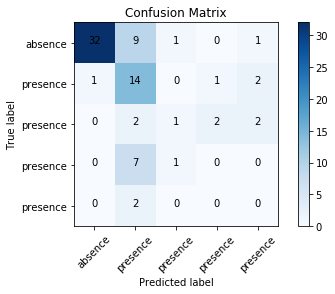

In [35]:
calculate_datasplit_performance(heartD_data, heartD_target, gnb)

#### 1.2 10-Fold Performance

In [44]:
calculate_10fold_performance(heartD_data, heartD_target, gnb)

Average Accuration : 0.5622
Average Precision : 0.3665
Average Recall : 0.3425


c:\users\wind-10\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### 2. Decision Tree ID3

#### 2.1 Data Split Performance

Akurasi: 0.4744

Classification Report
              precision    recall  f1-score   support

     absence       0.68      0.72      0.70        29
    presence       0.39      0.52      0.45        25
    presence       0.40      0.20      0.27        10
    presence       0.12      0.12      0.12         8
    presence       0.00      0.00      0.00         6

   micro avg       0.47      0.47      0.47        78
   macro avg       0.32      0.31      0.31        78
weighted avg       0.44      0.47      0.45        78




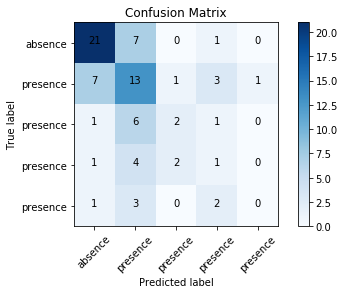

In [12]:
calculate_datasplit_performance(heartD_data, heartD_target, DescTree)

#### 2.2 10-Fold Performance

In [13]:
calculate_10fold_performance(heartD_data, heartD_target, DescTree)

c:\users\wind-10\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\wind-10\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Average Accuration : 0.4826
Average Precision : 0.3367
Average Recall : 0.3362


### 3. K-NN

#### 3.1 Data Split Performance

Akurasi: 0.4231

Classification Report
              precision    recall  f1-score   support

     absence       0.62      0.69      0.66        36
    presence       0.32      0.37      0.34        19
    presence       0.11      0.12      0.12         8
    presence       0.00      0.00      0.00        12
    presence       0.00      0.00      0.00         3

   micro avg       0.42      0.42      0.42        78
   macro avg       0.21      0.24      0.22        78
weighted avg       0.38      0.42      0.40        78




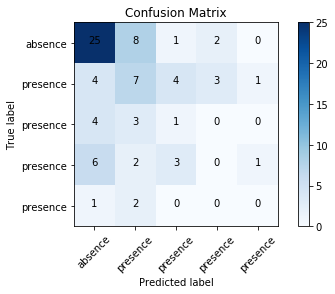

In [14]:
calculate_datasplit_performance(heartD_data, heartD_target, kneighbors)

#### 3.2 10-Fold Performance

In [15]:
calculate_10fold_performance(heartD_data, heartD_target, kneighbors)

Average Accuration : 0.4107
Average Precision : 0.2634
Average Recall : 0.2665


c:\users\wind-10\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 4. Multi Layer Perceptron

#### 4.1 Data Split Performance

Akurasi: 0.4872

Classification Report
              precision    recall  f1-score   support

     absence       0.60      0.88      0.71        32
    presence       0.30      0.33      0.32        21
    presence       0.50      0.15      0.24        13
    presence       0.33      0.09      0.14        11
    presence       0.00      0.00      0.00         1

   micro avg       0.49      0.49      0.49        78
   macro avg       0.35      0.29      0.28        78
weighted avg       0.46      0.49      0.44        78




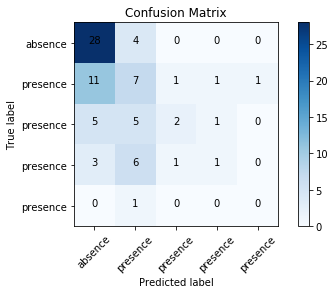

In [16]:
calculate_datasplit_performance(heartD_data, heartD_target, mlp)

#### 4.2 10-Fold Performance

In [17]:
calculate_10fold_performance(heartD_data, heartD_target, mlp)

c:\users\wind-10\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\wind-10\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\wind-10\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\wind-10\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

Average Accuration : 0.5148
Average Precision : 0.2893
Average Recall : 0.3096


## Analisis
Setelah dilakukan eksperimen terhadap 4 algoritma pembelajaran, *Naive Bayes* memiliki skor akurasi paling tinggi diantara algoritma pembelajaran lainnya. Oleh karena itu, kelompok kami memilih  Gaussian Naive Bayes sebagai model yang cocok untuk permasalahan diagnosa Heart Disease 

### Menyimpan model ke file eksternal

In [49]:
from sklearn.externals import joblib

joblib.dump(gnb,'gnb_HeartDisease_model.joblib')

['gnb_HeartDisease_model.joblib']

### Melakukan Pembacaan Model dari File Eksternal

In [50]:
gnb_load = joblib.load('gnb_HeartDisease_model.joblib')

### Melakukan Klasifikasi dengan Model

In [53]:
test_predict = gnb_load.predict(testD)
print(test_predict)

[0 0 1 1 0 0 4 1 0 1 1 1 0 4 0 4 2 0 1 0 0 1 0 1 3 0 1 3 3 1 0 1 2 0 1 0 0
 0 0 0 1 0 0 1 2 1 1 2 1 1 1 0 2 1 0 1 1 3 1 0 0 0 1 4 0 0 1 0 0 0 1 0 0 1
 0 1 1 0 0 0 0 4 1 1 0 1 1 0 1 1 3 0 0 0 0 0 0 1 1 0 4 0 0 0 1 1 0 1 1 3 0
 0 2 0 0 4 0 3 0 1 2 1 0 1 1 0 2 2 1 1 0 1 3 1 3 3 0 0 0 0 0]


In [68]:
import pandas as pd
>>> df = pd.DataFrame(some_list, columns=["colummn"])
>>> df.to_csv('list.csv', index=False)

0


Error: iterable expected, not numpy.int64